In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.decomposition import LatentDirichletAllocation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Load optimal model

In [ ]:
# read data
df1 = pd.read_csv('/content/drive/MyDrive/MIE1624_Group14/Course_Project/sentiment_analysis.csv', sep=",")
df1.head(10)

,ID,text,label
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeders Crown Super Sunday https://t.co/antImqAo4Y https...,1
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan on becoming #No1TestTeam in the world against all o...,1
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taking you to Maine Mendoza’s surprise thanksgiving pa...",1
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks a million to our custodial painters this summer. ...",1
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as of July 2017 Feschotte lab will be relocating to @C...,1
5,7.680980e+17,RT @SH4WNSMILE: -Who is excited for illuminate !? -.... https://t.co/AKnIVEGUOe,1
6,7.680980e+17,RT @KendallHuntRPD: The #firstdayofschool for students &amp; teachers. Good luck and have a Succ...,1
7,7.680980e+17,RT @BantySrkian: #SRK and kajol in the making of DDLJ song .. Both are greatest ever 🙏🙏🙏 https:/...,1
8,7.680980e+17,RT @GayHopper_com: I'm happy! https://t.co/fKXbN3Zhtd,1
9,7.680980e+17,"RT @StarCinema: Kathryn, Daniel share memorable experience in Barcelona SEE INTERVIEW HERE: http...",1


In [ ]:
# function to process tweets
def process_tweet(text):
  # change to lowercase
  text=text.lower()
  # remove URLs
  text=re.sub('((www\.[\s]+)|(https?://[^\s]+))','',text)
  # remove user tags
  text=re.sub('@[^\s]+','',text)
  # remove extra space
  text=re.sub('[\s]+',' ',text)
  # replace hashtags with words
  text=re.sub(r'#([^\s]+)',r'\1',text)
  # remove punctuation
  text= "".join([word for word in text if word not in string.punctuation])
  text = re.sub('[0-9]+', '', text)
  # tokenize
  text = re.split('\W+', text)
  # remove stopwords
  text = [word for word in text if word not in stopword]
  # lemmatize
  text = [wn.lemmatize(word) for word in text]
  # reverse tokenizatin
  text= " ".join([word for word in text if word not in string.punctuation])
  text = re.sub('[0-9]+', '', text)
  return text

In [ ]:
# process tweets
df1['processed_text'] = df1['text'].apply(lambda x: process_tweet(x))
df1.head(10)

,ID,text,label,processed_text
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeders Crown Super Sunday https://t.co/antImqAo4Y https...,1,josh jenkins looking forward tab breeder crown super sunday
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan on becoming #No1TestTeam in the world against all o...,1,rt congratulation pakistan becoming notestteam world odds jipakzindabadrallies
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taking you to Maine Mendoza’s surprise thanksgiving pa...",1,rt september taking maine mendoza surprise thanksgiving party threw fan
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks a million to our custodial painters this summer. ...",1,rt newly painted wall thanks million custodial painter summer great job ladiesecproud
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as of July 2017 Feschotte lab will be relocating to @C...,1,rt excited announce july feschotte lab relocating mbg
5,7.680980e+17,RT @SH4WNSMILE: -Who is excited for illuminate !? -.... https://t.co/AKnIVEGUOe,1,rt excited illuminate
6,7.680980e+17,RT @KendallHuntRPD: The #firstdayofschool for students &amp; teachers. Good luck and have a Succ...,1,rt firstdayofschool student amp teacher good luck successful school year educationmatters ht
7,7.680980e+17,RT @BantySrkian: #SRK and kajol in the making of DDLJ song .. Both are greatest ever 🙏🙏🙏 https:/...,1,rt srk kajol making ddlj song greatest ever
8,7.680980e+17,RT @GayHopper_com: I'm happy! https://t.co/fKXbN3Zhtd,1,rt im happy
9,7.680980e+17,"RT @StarCinema: Kathryn, Daniel share memorable experience in Barcelona SEE INTERVIEW HERE: http...",1,rt kathryn daniel share memorable experience barcelona see interview


In [ ]:
# data split
y1=df1['label']
document1=df1['processed_text']
document_train, document_test, y_train, y_test = train_test_split(document1, y1, test_size=0.2, random_state=0)

In [ ]:
# TFIDF feature selection
vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=True)
vectorizer.fit(document_train)
X_train=vectorizer.transform(document_train)
features_name = vectorizer.get_feature_names_out()

In [ ]:
clf = LogisticRegression(C=10,solver='sag',max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, solver='sag')

# Twitter data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MIE1624_Group14/Course_Project/tweet.csv', encoding= 'unicode_escape')

In [ ]:
df.head()

,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts
0,0,2.679788e+09,dee4peace,"Retired U.S. Coast Guard, Mom, Mastiff mom, health/wellness. Learn MMT, Progressive Activist, Re...","Vestal, NY",2812,2626,149611,41845.61498,1.514760e+18,4/15/2022,0,French Election 2022: Marine Le Pen's agenda sends shockwaves through Europe @WIONews #EU #Europ...,"[{'text': 'EU', 'indices': [86, 89]}, {'text': 'Europe', 'indices': [90, 97]}, {'text': 'Russia'...",en,NaN,0,44666.0197
1,1,1.347160e+18,tygerdisco,Just hanging out,NaN,91,4,934,44203.53877,1.514760e+18,4/15/2022,2992,Let's unite to stop the war in Ukraine. Let's defend freedom and save lives. We ask world leader...,"[{'text': 'ArmUkraineNow', 'indices': [115, 129]}]",en,NaN,0,44666.00663
2,2,4.124746e+08,moveebuff1953,Proud Ukrainian Canadian ...My heart bleeds when I see what Putin and his band of Russian monste...,Planet Earth,1365,382,48626,40861.78522,1.514760e+18,4/15/2022,0,I want to go to #Ukraine just to hug the #elderly who are all alone. The sadness and despair is...,"[{'text': 'Ukraine', 'indices': [16, 24]}, {'text': 'elderly', 'indices': [41, 49]}, {'text': 'P...",en,NaN,0,44666.0197
3,3,2.725029e+08,GainMoneyFaster,?????????????? ?????????????? showing you best Clever Passive Income streams ???ª?...,Bilbao,5689,5378,36488,40628.70948,1.514760e+18,4/15/2022,0,HOMEWORK-ONLINE-HOMEWORK\n\nhttps://t.co/CLU7gXSmt1\n\n#passive #income #money #earn #internet #...,"[{'text': 'passive', 'indices': [51, 59]}, {'text': 'income', 'indices': [60, 67]}, {'text': 'mo...",en,NaN,0,44666.0197
4,4,6.201370e+08,cgtnamerica,"Watch live: https://t.co/nz0et8flN6 \nMaterial is distributed by MediaLinks TV, LLC on behalf of...","Washington, DC",2322,289886,116890,41087.61502,1.514760e+18,4/15/2022,0,"Images from #Ukraine.\n\nFor more exclusive content on the #Russia-Ukraine conflict, subscribe t...","[{'text': 'Ukraine', 'indices': [12, 20]}, {'text': 'Russia', 'indices': [57, 64]}]",en,NaN,0,44666.00918


In [ ]:
df.columns

Index(['Unnamed: 0', 'userid', 'username', 'acctdesc', 'location', 'following',
       'followers', 'totaltweets', 'usercreatedts', 'tweetid',
       'tweetcreatedts', 'retweetcount', 'text', 'hashtags', 'language',
       'coordinates', 'favorite_count', 'extractedts'],
      dtype='object')

In [ ]:
df.shape

(16960, 18)

## 1.0 Data cleaning

### 1.1 Language Filtering

To reduce the complexity of sentiment analysis, we only consider the comments and tweets written in English.

In [ ]:
df = df[df['language'] == 'en'] #only consider the comments in English 

In [ ]:
df.shape

(11242, 18)

### 1.2 Column Cleaning

In [ ]:
df = df.drop(['Unnamed: 0', 'username', 'acctdesc', 'following',
       'followers', 'totaltweets', 'usercreatedts', 'tweetid',
       'retweetcount', 'hashtags', 'language',
       'coordinates', 'favorite_count', 'extractedts'], axis = 1)

###  1.3 Checking Null Values

In [ ]:
df.isnull().sum()

userid               0
location          3789
tweetcreatedts       0
text                 0
dtype: int64

## 2.0 Tweet Cleaning

In [ ]:
# process tweets
df['processed_text'] = df['text'].apply(lambda x: process_tweet(x))
df.head(10)

,userid,location,tweetcreatedts,text,processed_text
0,2.679788e+09,"Vestal, NY",4/15/2022,French Election 2022: Marine Le Pen's agenda sends shockwaves through Europe @WIONews #EU #Europ...,french election marine le pen agenda sends shockwaves europe eu europe russia unity peace nato via
1,1.347160e+18,NaN,4/15/2022,Let's unite to stop the war in Ukraine. Let's defend freedom and save lives. We ask world leader...,let unite stop war ukraine let defend freedom save life ask world leader armukrainenow
2,4.124746e+08,Planet Earth,4/15/2022,I want to go to #Ukraine just to hug the #elderly who are all alone. The sadness and despair is...,want go ukraine hug elderly alone sadness despair written face everyone deserves kindness amp co...
3,2.725029e+08,Bilbao,4/15/2022,HOMEWORK-ONLINE-HOMEWORK\n\nhttps://t.co/CLU7gXSmt1\n\n#passive #income #money #earn #internet #...,homeworkonlinehomework passive income money earn internet euro dollar stock exchange currency va...
4,6.201370e+08,"Washington, DC",4/15/2022,"Images from #Ukraine.\n\nFor more exclusive content on the #Russia-Ukraine conflict, subscribe t...",image ukraine exclusive content russiaukraine conflict subscribe cgtn
5,1.529304e+08,UK,4/15/2022,The #Anonymous collective has sent 7.000.000 anti-war texts to Russian cell phone users to tell ...,anonymous collective sent antiwar text russian cell phone user tell truth putin invasion ukraine
6,1.042778e+08,"Manhattan, NY",4/15/2022,Ukraine crisis: Find out how @UNDP is providing emergency support to victims of shelling in east...,ukraine crisis find providing emergency support victim shelling east ukraine amp support displac...
8,1.356630e+18,Ukraine,4/15/2022,"Fox. A sea of energy and positivity. Incredibly handsome, about 8 years old.\nOur shelter needs ...",fox sea energy positivity incredibly handsome year old shelter need help raising fund food anima...
9,5.205707e+08,?? ¨??? ?¬?¨?? ?? ?? ??? ¨? ?§?ñ «? ?? «ø?« ?? ???« ?§???«,4/15/2022,#Ukrainian media reports about powerful explosions in #Kyiv.\n\nCity ????CCTV cameras shows th...,ukrainian medium report powerful explosion kyiv city cctv camera show result shelling district c...
10,1.352460e+18,"Tehachapi, CA",4/15/2022,It arrived. #wolverines #ukraine #reddawn https://t.co/gYt8yCsfGq,arrived wolverine ukraine reddawn


## 3.0 Implementing Model

In [ ]:
X = vectorizer.transform(df['processed_text'])
# shows the feature names, to be used for feature importance analysis
features_name = vectorizer.get_feature_names_out()

In [ ]:
y=clf.predict(X)

In [70]:
proba = clf.predict_proba(X).tolist()

In [ ]:
df['label'] = y.tolist()

In [72]:
pos_proba = [sublist[-1] for sublist in proba]
len(pos_proba)

11242

In [76]:
neg_proba = [sublist[0] for sublist in proba]
len(neg_proba)

11242

In [77]:
df['pos'] = pos_proba
df['neg'] = neg_proba

In [ ]:
df.label.value_counts()

0    8907
1    2335
Name: label, dtype: int64

In [59]:
df.head()

,userid,location,tweetcreatedts,text,processed_text,label
0,2.679788e+09,"Vestal, NY",4/15/2022,French Election 2022: Marine Le Pen's agenda sends shockwaves through Europe @WIONews #EU #Europ...,french election marine le pen agenda sends shockwaves europe eu europe russia unity peace nato via,0
1,1.347160e+18,NaN,4/15/2022,Let's unite to stop the war in Ukraine. Let's defend freedom and save lives. We ask world leader...,let unite stop war ukraine let defend freedom save life ask world leader armukrainenow,0
2,4.124746e+08,Planet Earth,4/15/2022,I want to go to #Ukraine just to hug the #elderly who are all alone. The sadness and despair is...,want go ukraine hug elderly alone sadness despair written face everyone deserves kindness amp co...,0
3,2.725029e+08,Bilbao,4/15/2022,HOMEWORK-ONLINE-HOMEWORK\n\nhttps://t.co/CLU7gXSmt1\n\n#passive #income #money #earn #internet #...,homeworkonlinehomework passive income money earn internet euro dollar stock exchange currency va...,0
4,6.201370e+08,"Washington, DC",4/15/2022,"Images from #Ukraine.\n\nFor more exclusive content on the #Russia-Ukraine conflict, subscribe t...",image ukraine exclusive content russiaukraine conflict subscribe cgtn,1


In [60]:
df.columns

Index(['userid', 'location', 'tweetcreatedts', 'text', 'processed_text',
       'label'],
      dtype='object')

In [78]:
df[['userid', 'location', 'tweetcreatedts','processed_text',
       'label', 'pos', 'neg']].to_csv('tweet_labeled.csv')

## 4.0 Visualize Results

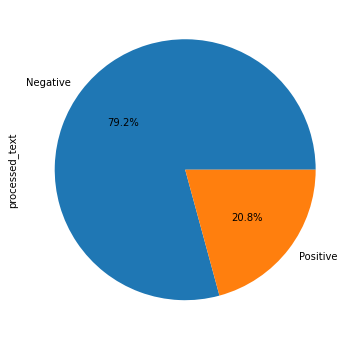

In [ ]:
# plot piechart for polarity 
pie_df = df.groupby("label")['processed_text'].count()
pie_df.index = ['Negative', 'Positive']
pie_df.plot.pie(autopct="%.1f%%", figsize = (6, 6))

In [ ]:
# plot word cloud for positive
words = df[df['label'] == 1]['processed_text'].values

# generate word cloud
words = ' '.join([s for s in words])
wordcloud = WordCloud(max_font_size = 50, max_words = 500, random_state = 101).generate(str(words))

plt.figure(dpi = 700, figsize=(10,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud for positive on Twitter')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# plot word cloud for negative
words_n = df[df['label'] == 0]['processed_text'].values

# generate word cloud
words_n = ' '.join([s for s in words_n])
wordcloud_n = WordCloud(max_font_size = 50, max_words = 500, random_state = 101).generate(str(words_n))

plt.figure(dpi = 700, figsize=(10,7))
plt.imshow(wordcloud_n, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud for negative on Twitter')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# positive emotions in timeseries
time_positive_df = df.groupby(by="tweetcreatedts")["label"].sum()
time_positive_df

tweetcreatedts
10/15/2022    180
11/15/2022    300
4/15/2022     234
5/15/2022     534
6/15/2022     450
7/15/2022     212
8/15/2022     205
9/15/2022     220
Name: label, dtype: int64

<BarContainer object of 8 artists>

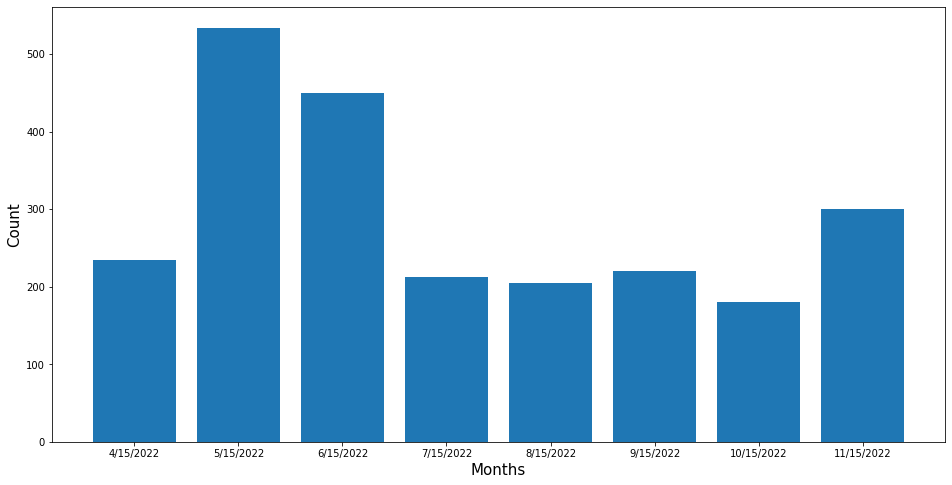

In [ ]:
x = ['4/15/2022', '5/15/2022', '6/15/2022', '7/15/2022', '8/15/2022', '9/15/2022', '10/15/2022', '11/15/2022']
y = [234, 534, 450, 212, 205, 220, 180, 300]
plt.figure(figsize=(16, 8))
plt.xlabel('Months', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.bar(x, y)


## Beginning 4 months 

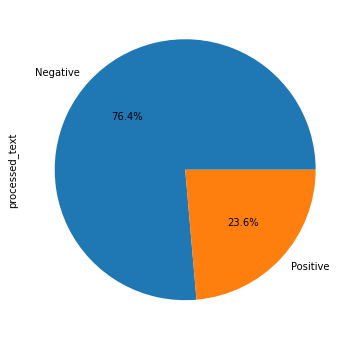

In [ ]:
# plot piechart for polarity 
pie_df = df[df['tweetcreatedts'].isin(['4/15/2022', '5/15/2022', '6/15/2022', '7/15/2022'])].groupby("label")['processed_text'].count()
pie_df.index = ['Negative', 'Positive']
pie_df.plot.pie(autopct="%.1f%%", figsize = (6, 6))

## Last 4 months

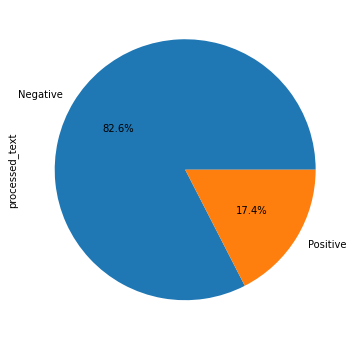

In [ ]:
# plot piechart for polarity 
pie_df = df[df['tweetcreatedts'].isin(['8/15/2022', '9/15/2022', '10/15/2022', '11/15/2022'])].groupby("label")['processed_text'].count()
pie_df.index = ['Negative', 'Positive']
pie_df.plot.pie(autopct="%.1f%%", figsize = (6, 6))

# Reddit Data

In [ ]:
df_r = pd.read_csv('/content/drive/MyDrive/MIE1624_Group14/Course_Project/reddit.csv', encoding= 'unicode_escape')

In [ ]:
df_r.head()

,title,score,id,subreddit,url,num_comments,body,created
0,Subscribe to r/RussiaUKraineWar2022 on Telegram for the fastest updates and more unseen footage....,473,v0gm37,RussiaUkraineWar2022,https://t.me/UkraineWarPosts,1,NaN,1.653847e+09
1,"10,000 servicemen of the second wave from training in UK are returning to Ukraine",14371,y26xch,RussiaUkraineWar2022,https://i.redd.it/5e0wl0p78et91.jpg,562,NaN,1.665589e+09
2,r/RussiaUkraineWar2022 Predictions Tournament,18646,ueslps,RussiaUkraineWar2022,https://reddit.com/r/RussiaUkraineWar2022/predictions?tournament=tnmt-15025d7c-5d52-4fc6-8f3c-c4...,1,NaN,1.665666e+09
3,"I'm safe, fifteen hours with a shovel in my hands and I have my own little house",1519,y39tem,RussiaUkraineWar2022,https://i.redd.it/m4us0z3gzmt91.jpg,160,"If you have a desire to help me, write to me.",1.665695e+09
4,this is my shell. there are many like it. but this one is mine.,339,y3hhep,RussiaUkraineWar2022,https://i.redd.it/t9c4v2iqmot91.jpg,25,NaN,1.665714e+09


In [ ]:
df_r.columns

Index(['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body',
       'created'],
      dtype='object')

In [ ]:
df_r.shape

(872, 8)

## 1.0 Data cleaning

### 1.1 Column Cleaning

In [ ]:
df_r = df_r.drop([ 'score', 'subreddit', 'url', 'num_comments', 'body'], axis = 1)
df_r.head()

,title,id,created
0,Subscribe to r/RussiaUKraineWar2022 on Telegram for the fastest updates and more unseen footage....,v0gm37,1.653847e+09
1,"10,000 servicemen of the second wave from training in UK are returning to Ukraine",y26xch,1.665589e+09
2,r/RussiaUkraineWar2022 Predictions Tournament,ueslps,1.665666e+09
3,"I'm safe, fifteen hours with a shovel in my hands and I have my own little house",y39tem,1.665695e+09
4,this is my shell. there are many like it. but this one is mine.,y3hhep,1.665714e+09


In [ ]:
df_r = df_r.drop(['created'], axis = 1)

### 1.2 Checking Null Values

In [ ]:
df_r.isnull().sum()

title    0
id       0
dtype: int64

## 2.0 Text Cleaning

In [ ]:
# process tweets
df_r = df_r.rename(columns={'title': 'reddit'})
df_r['processed_reddit'] = df_r['reddit'].apply(lambda x: process_tweet(x))
df_r.head(10)

,reddit,id,processed_reddit
0,Subscribe to r/RussiaUKraineWar2022 on Telegram for the fastest updates and more unseen footage....,v0gm37,subscribe rrussiaukrainewar telegram fastest update unseen footage
1,"10,000 servicemen of the second wave from training in UK are returning to Ukraine",y26xch,serviceman second wave training uk returning ukraine
2,r/RussiaUkraineWar2022 Predictions Tournament,ueslps,rrussiaukrainewar prediction tournament
3,"I'm safe, fifteen hours with a shovel in my hands and I have my own little house",y39tem,im safe fifteen hour shovel hand little house
4,this is my shell. there are many like it. but this one is mine.,y3hhep,shell many like one mine
5,"Aleksey Martynov, a mobilized Moscow government official, returned from Ukraine. He was mobilize...",y3897p,aleksey martynov mobilized moscow government official returned ukraine mobilized september octob...
6,The head of the collaborationist Kherson militaryâcivilian administration in Russian-occupied ...,y3i9wm,head collaborationist kherson militaryâ civilian administration russianoccupied ukraine volodymy...
7,"Jackie and Vladyslav served together in Mariupol. Vlad managed to get out, reluctantly leaving J...",y3hb4n,jackie vladyslav served together mariupol vlad managed get reluctantly leaving jackie azovstal c...
8,RUSSIAN civilians have been urged to flee from Kherson as Ukrainian fighters are only 12 miles f...,y33lda,russian civilian urged flee kherson ukrainian fighter mile reclaiming occupied city
9,Mobilized Muscovites sent to front without training and suffered heavy losses,y3d8kd,mobilized muscovite sent front without training suffered heavy loss


## 3.0 Implementing Model

In [ ]:
X_r = vectorizer.transform(df_r['processed_reddit'])
# shows the feature names, to be used for feature importance analysis
features_name_r = vectorizer.get_feature_names_out()

In [ ]:
y_r=clf.predict(X_r)

In [79]:
proba_r = clf.predict_proba(X_r)

In [80]:
pos_proba_r = [sublist[-1] for sublist in proba_r]
len(pos_proba_r)

872

In [81]:
neg_proba_r = [sublist[0] for sublist in proba_r]
len(neg_proba_r)

872

In [83]:
df_r['pos'] = pos_proba_r
df_r['neg'] = neg_proba_r

In [ ]:
df_r['label'] = y_r.tolist()

In [ ]:
df_r.label.value_counts()

0    772
1    100
Name: label, dtype: int64

In [84]:
df_r.to_csv('reddit_labeled.csv')

## 4.0 Visualize Results

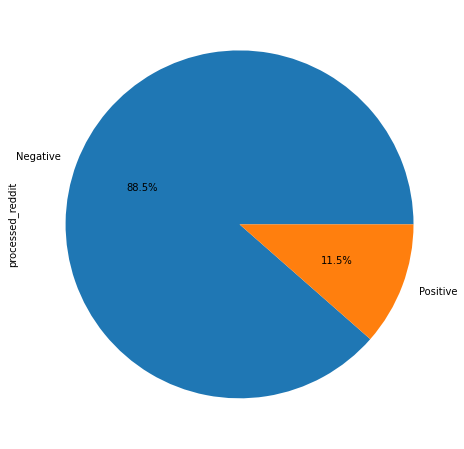

In [ ]:
# plot piechart for polarity 
pie_df_r = df_r.groupby("label")['processed_reddit'].count()
pie_df_r.index = ['Negative', 'Positive']
pie_df_r.plot.pie(autopct="%.1f%%", figsize = (8, 8))

In [ ]:
# plot word cloud for positive
words_r = df_r[df_r['label'] == 1]['processed_reddit'].values

# generate word cloud
words_r = ' '.join([s for s in words_r])
wordcloud_r = WordCloud(max_font_size = 50, max_words = 500, random_state = 101).generate(str(words_r))

plt.figure(dpi = 700, figsize=(10,7))
plt.imshow(wordcloud_r, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud for positive on Reddit')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# plot word cloud for positive
words_r_n = df_r[df_r['label'] == 0]['processed_reddit'].values

# generate word cloud
words_r_n = ' '.join([s for s in words_r_n])
wordcloud_r_n = WordCloud(max_font_size = 50, max_words = 500, random_state = 101).generate(str(words_r_n))

plt.figure(dpi = 700, figsize=(10,7))
plt.imshow(wordcloud_r_n, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud for negative on Reddit')
plt.show()

Output hidden; open in https://colab.research.google.com to view.